In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from IPython.display import display
from fastprogress import master_bar, progress_bar

In [5]:
df = pd.read_csv('congested_class.csv')

In [6]:
CATEGORIES = ['no','yes']
data_dir = '/media/data/Datasets/TrafficImages/Final'
def create_training():
    training_data = []
    box = (120, 30, 420, 295)
    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)
        
        for img in progress_bar(os.listdir(path)[0:50]):
            try:
                im = Image.open(os.path.join(path, img))
                im_arr = np.asarray(im.crop(box).convert('L'))
                training_data.append([im_arr,class_num])
            except Exception as e:
                pass
    return training_data

In [7]:
training_data = create_training()

In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
1
0
1
0
0


In [10]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [11]:
X = np.array(X).reshape(-1, 300, 265, 1)

In [12]:
X[1].shape

(300, 265, 1)

In [13]:
im2 = Image.fromarray(X[1].reshape((-1,300)))

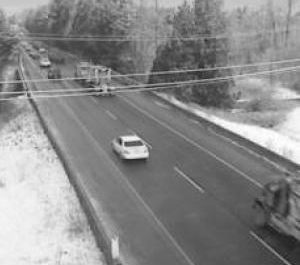

In [14]:
display(im2)

In [15]:
import pickle

pickle_out = open("X_matched.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_matched.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()